Saving 1561921462_kaalagune_dot_com.jpg to 1561921462_kaalagune_dot_com (1).jpg


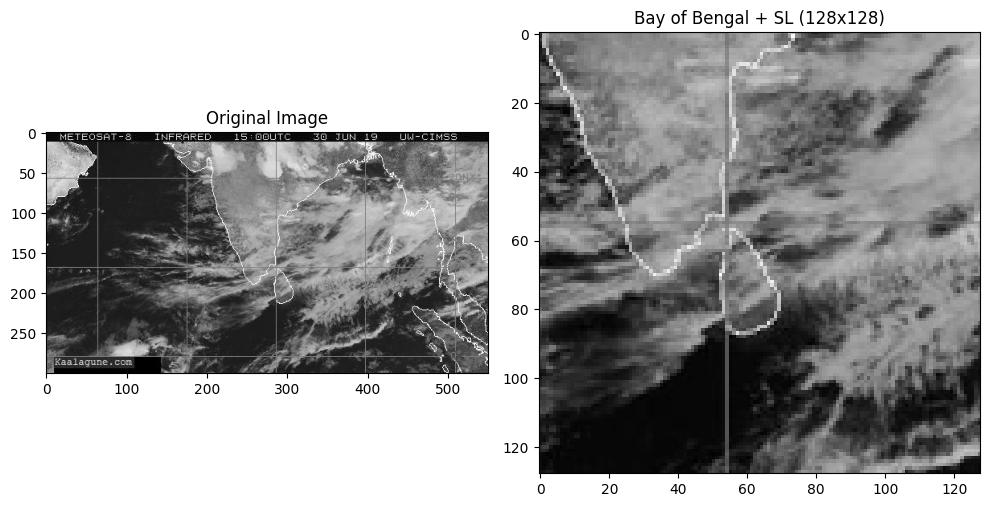

,filename,mean_brightness_global,std_brightness_global,min_brightness,max_brightness,cloud_cover_pct_global,roi_mean_brightness,roi_cloud_cover_pct,original_width,original_height,crop_box,resized_shape
0,1561921462_kaalagune_dot_com (1).jpg,95.788327,61.110418,0,255,9.266667,115.836609,4.150391,550,300,"(210, 90, 390, 270)",128x128


✅ Crop saved as 'bay_sl_crop_128x128.jpg' and features exported to 'satellite_crop_features.csv'


In [3]:
# ===============================
# 🌧️ Satellite Crop & Feature Extractor (Bay of Bengal + SL)
# ===============================

from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Step 1: Upload Satellite Image ===
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# === Step 2: Load and Convert to Grayscale ===
image = Image.open(filename).convert("L")  # Infrared/brightness
img_array = np.array(image)

# === Step 3: Global Stats ===
mean_brightness = np.mean(img_array)
std_brightness = np.std(img_array)
min_brightness = np.min(img_array)
max_brightness = np.max(img_array)

# === Step 4: Cloud Cover Estimation ===
threshold = 180  # Brighter = clouds in IR
cloud_mask = img_array > threshold
global_cloud_cover_pct = np.sum(cloud_mask) / cloud_mask.size * 100

# === Step 5: Crop Region of Interest (Bay of Bengal + SL) ===
CROP_BOX = (210, 90, 390, 270)  # (left, top, right, bottom)
RESIZE_SHAPE = (128, 128)

roi_array = img_array[CROP_BOX[1]:CROP_BOX[3], CROP_BOX[0]:CROP_BOX[2]]
roi_image = Image.fromarray(roi_array).resize(RESIZE_SHAPE)

# === Step 6: ROI Stats ===
roi_array_resized = np.array(roi_image)
roi_mean = np.mean(roi_array_resized)
roi_cloud_cover_pct = np.sum(roi_array_resized > threshold) / roi_array_resized.size * 100

# === Step 7: Display Results ===
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(roi_array_resized, cmap='gray')
plt.title('Bay of Bengal + SL (128x128)')
plt.tight_layout()
plt.show()

# === Step 8: Summary Table ===
summary_data = {
    "filename": filename,
    "mean_brightness_global": mean_brightness,
    "std_brightness_global": std_brightness,
    "min_brightness": min_brightness,
    "max_brightness": max_brightness,
    "cloud_cover_pct_global": global_cloud_cover_pct,
    "roi_mean_brightness": roi_mean,
    "roi_cloud_cover_pct": roi_cloud_cover_pct,
    "original_width": image.size[0],
    "original_height": image.size[1],
    "crop_box": str(CROP_BOX),
    "resized_shape": f"{RESIZE_SHAPE[0]}x{RESIZE_SHAPE[1]}"
}

df = pd.DataFrame([summary_data])
display(df)

# === Step 9: Save CSV and Cropped Image ===
df.to_csv("satellite_crop_features.csv", index=False)
roi_image.save("bay_sl_crop_128x128.jpg")
print("✅ Crop saved as 'bay_sl_crop_128x128.jpg' and features exported to 'satellite_crop_features.csv'")
